# *Fake or Real* news

## Table of Contents:
1. [Introduction](#1.-Introduction)
    
    
2. [Data](#2.-Data)
    
    2.1. [Import Libraries & Data Loading](#2.1.-Import-Libraries-&-Data-Loading)

    2.2. [Data Cleaning](#2.2.-Data-Cleaning)
    
    
3. [EDA](#3.-EDA)


4. [Title length vs Fake News](#4.-Title-length-vs-Fake-News)


5. [Training and testing datasets](#5.-Training-and-testing-datasets)

## 1. Introduction

## 2. Data

### 2.1. Import Libraries & Data Loading

In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\urszu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Load Data
df = pd.read_csv('../FakeOrReal/data/fake_or_real_news.csv')
df.head(7)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE


#### *Shape*:

###### 1. Numbers of rows:

In [16]:
df.shape[0]

6335

###### 2. Numbers of columns:

In [17]:
df.shape[1]

4

### 2.2. Data Cleaning

In [18]:
def clean():
    print('Check the data null values, duplicate and missing values')
    print('NULL values: {}'.format(df.isnull().sum()))
    print('Duplicates: {}'.format(df.duplicated().sum()))
    
clean()

Check the data null values, duplicate and missing values
NULL values: Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
Duplicates: 0


#### **Conclusions**:

There is no null values, no duplicated values. This data is already **clean**.

### 3. EDA

#### Real vs Fake news

In [19]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

Well, the numbers are really close.

In [20]:
fig = px.pie(df, names = 'label', title = "% of real and fake news", color_discrete_sequence = px.colors.sequential.dense)
fig.show()

There is a little difference between **real and fake news** in favor of *real* by **7 values**. 

### 4. Title length vs Fake News

#### Does length of title has an influence on whether or not there is real or fake news ?

Create new columns **title_len** and **text_len**

In [21]:
df['title_len'] = df['title'].apply(len)
df['text_len'] = df['text'].apply(len)
df.head()

,Unnamed: 0,title,text,label,title_len,text_len
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840


Graphs of **'label'** and **'title_len'**

<AxesSubplot:xlabel='label', ylabel='title_len'>

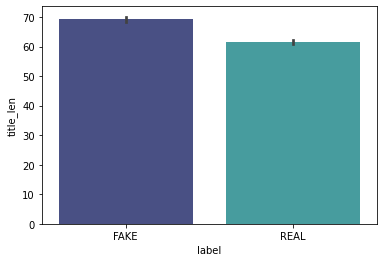

In [22]:
sns.barplot(x = df['label'], y = df['title_len'], palette = "mako")

In [23]:
fig, ax = plt.subplots()
sns.boxplot(y = df["title_len"], x = df['label'], palette = "mako")

NameError: name 'plt' is not defined

**Fake News Conclusion:**

From the chart, we see that the **median** length of the title is about **67** letters. Moreover the half length of the title ranges **from 50 to 70** letters.

**Real News Conclusion:**

From the boxplot, we see that the **median** length of the title is about **60** for **REAL** news and half length of the title ranges **from 47 to 60** letters.

#### Basic statistics 

In [24]:
df.groupby(df['label'])['title_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
FAKE,3164.0,69.180784,27.084770,1.0,51.0,68.0,84.0,289.0
REAL,3171.0,61.383160,19.056875,10.0,48.0,61.0,73.0,148.0


**Conclusion**:

Boxplot conclusions were right, the mean is greater for the *FAKE* news than the *REAL* news. Moreover max value from *FAKE* news was few time more than the max value from *REAL* news. 

**To sum up, we should be vigilant about long titles because there may be fake news behind them.**

### 5. Training and testing datasets

In [25]:
df['all_text'] = df['title']+"\n"+df['text']
df['all_text_length']=df['all_text'].apply(lambda x:len(x.split()))
df.head(2)

,Unnamed: 0,title,text,label,title_len,text_len,all_text,all_text_length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518,You Can Smell Hillary’s Fear\nDaniel Greenfiel...,1301
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646,Watch The Exact Moment Paul Ryan Committed Pol...,460


#### New dataframes labels

In [26]:
labels = df.label
labels.head(7)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
Name: label, dtype: object

##### Split into traning and testing dataset

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5068,), (1267,), (5068,), (1267,))

#### Initialize a TfidVectorizer

In [29]:
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.75)

Fit and transform train set, transform test set

In [30]:
tfidf_train = tfidf.fit_transform(x_train)
tfidf_train

<5068x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 1337098 stored elements in Compressed Sparse Row format>

In [31]:
tfidf_test = tfidf.transform(x_test)
tfidf_test

<1267x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 322056 stored elements in Compressed Sparse Row format>

Initialize a Passive Aggresive Classifier

In [34]:
pac=PassiveAggressiveClassifier(max_iter=70)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=70)

In [35]:
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%
